In [50]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


# loading data

In [51]:
import pandas as pd 

In [52]:
data = pd.read_csv(r'C:\Users\sarvesh.kesharwani\Pictures\DSC\Spam_Classifier\2. eda_n_dataCleaning\3. cleaned_data.csv')
data.sample(3)

,target,text_msg
4718,ham,Ok i also wan 2 watch e 9 pm show...
328,ham,Any chance you might have had with me evaporat...
2682,ham,"Alright if you're sure, let me know when you'r..."


# target col encoding

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['target'] = le.fit_transform(data['target'])
data.head()


,target,text_msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# constructing new_features from `text_msg` col

#### loading nltk tools

In [54]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sarvesh.kesharwani\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
data.sample(3)

,target,text_msg
459,0,When are you going to ride your bike?
3132,0,HI DARLIN HOW WAS WORK DID U GET INTO TROUBLE?...
3704,0,Does daddy have a bb now.


#### `num_characters` col construction

In [56]:
data['num_characters'] = data['text_msg'].apply(len)
data.sample(3)

,target,text_msg,num_characters
3183,0,Hey what are you doing. Y no reply pa..,39
4849,0,Dai i downloaded but there is only exe file wh...,91
2417,0,Do u noe how 2 send files between 2 computers?,46


#### `num_words` col construction

In [57]:
data['num_words'] = data['text_msg'].apply(lambda x: len(nltk.word_tokenize(str(x))))
data.sample(3)

,target,text_msg,num_characters,num_words
1962,0,Oh sorry please its over,24,5
3449,0,R u here yet? I'm wearing blue shirt n black p...,51,14
1963,0,Hey are we going for the lo lesson or gym?,43,11


#### `num_sentences` col construction

In [58]:
data['num_sentences'] = data['text_msg'].apply(lambda x: len(nltk.sent_tokenize(x)))
data.head(3)

,target,text_msg,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


#### checking if newly constructed features truly help in differentiating categories or not

##### checking stats for ham and spam classes, if they are differentiating factors or not

In [59]:
# ham and spam
data[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.980267,18.455794,1.965564
std,58.239404,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [60]:
# ham
data[data['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.461913,17.123782,1.820195
std,56.362288,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [61]:
# spam
data[data['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [62]:
# stats of ham and spam msgs clearly looks different, which make it identifying factor for classification.
# so next we can try plotting these stats to see it visually and more clearly.

##### checking same dist. to check same thing visually

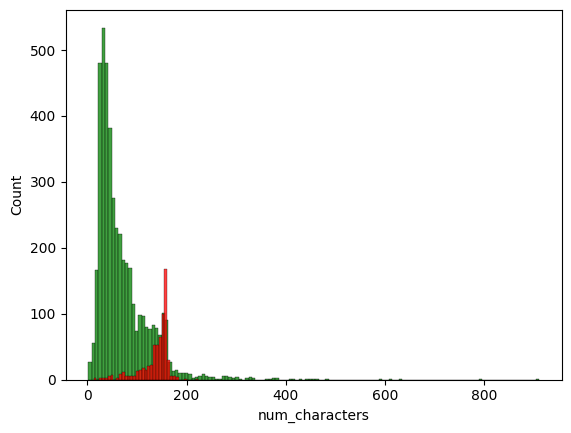

In [63]:
# hist comparison of num of characters in both categories
sns.histplot(data[data['target']==0]['num_characters'], color='g')
sns.histplot(data[data['target']==1]['num_characters'], color='r')
plt.show()

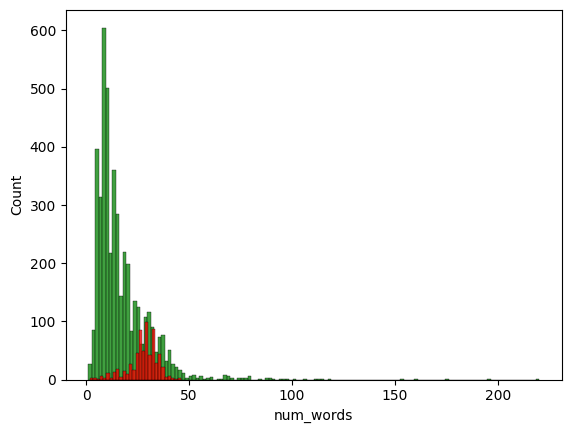

In [64]:
# hist comparison of num of words in both categories
sns.histplot(data[data['target']==0]['num_words'], color='g')
sns.histplot(data[data['target']==1]['num_words'], color='r')
plt.show()

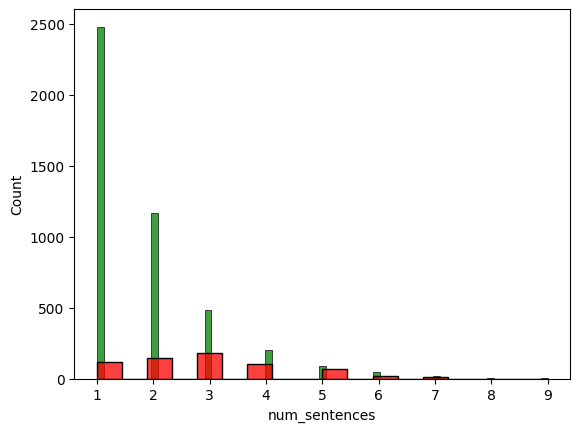

In [65]:
# hist comparison of num of sentences in both categories
sns.histplot(data[(data['target']==0) & (data['num_sentences']<10)]['num_sentences'], color='g')
sns.histplot(data[(data['target']==1) & (data['num_sentences']<10)]['num_sentences'], color='r')
plt.show()

***

# doing eda to perform feature selection

##### checking relationship b/w cols to select better features and drop non_imp features. (visual version of corr_plot)

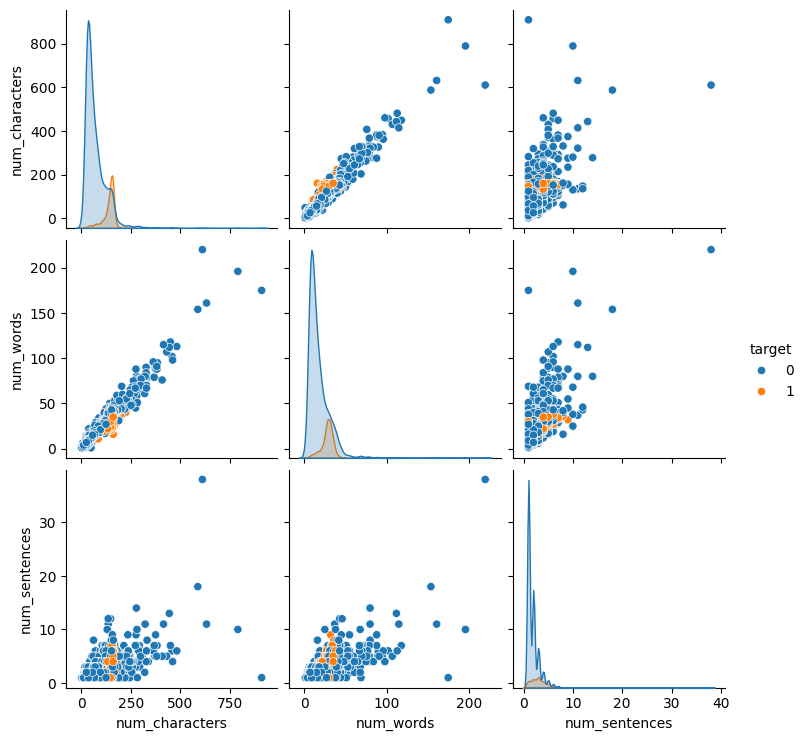

In [66]:
sns.pairplot(data, hue='target')

#### eda (corr plot) -> feature selection 

In [67]:
data.sample(3)

,target,text_msg,num_characters,num_words,num_sentences
2196,0,I have had two more letters from . I will copy...,101,24,3
770,0,It does it on its own. Most of the time it fix...,117,27,4
4837,0,Darren was saying dat if u meeting da ge den w...,134,33,3


In [68]:
data1 = data.drop(columns=['text_msg'], axis=1)

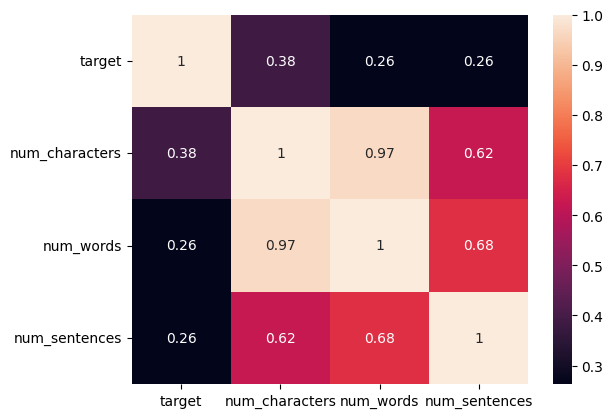

from corr plot, rel b/w num_characters & num_words seems really high and num_characters has very high correlation with target var, unlike num_words thus we can drop num_words col


In [69]:
sns.heatmap(data1.corr(), annot=True)
plt.show()
print('from corr plot, rel b/w num_characters & num_words seems really high and num_characters has very high correlation with target var, unlike num_words thus we can drop num_words col')

<Axes: xlabel='num_characters', ylabel='num_words'>

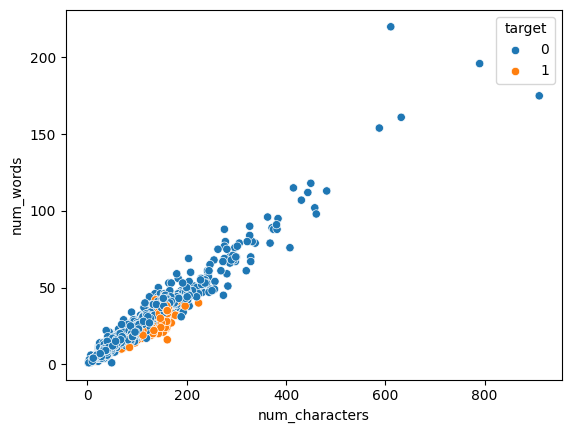

In [70]:
sns.scatterplot(x=data['num_characters'], y=data['num_words'], hue=data['target'])

In [71]:
# dropping `num_words` col
data.drop(columns=['num_words'], axis=1, inplace=True)
data.head()

,target,text_msg,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


***

# feature construction using text_msg col

### preprocessing text_msg to create feature

In [72]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [73]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [74]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [75]:
def transform_text(text):
    translator = str.maketrans('', '', string.punctuation)
    ps = PorterStemmer()

    text = text.lower()
    text = nltk.word_tokenize(text)
    clean_text=[]
    for word in text:
        if word not in stopwords.words('english'):
            word = word.translate(translator)
            if word.isalnum():
                clean_text.append(ps.stem(word))
    return ' '.join(clean_text)

In [76]:
transform_text("sarvesh's dragon is playing game!")

'sarvesh s dragon play game'

In [77]:
data['clean_mail'] = data['text_msg'].apply(transform_text)

In [78]:
data.sample(3)

,target,text_msg,num_characters,num_sentences,clean_mail
3337,0,Mmmmm ... It was sooooo good to wake to your w...,153,4,mmmmm sooooo good wake word morn love mmmm fuc...
3743,0,His frens go then he in lor. Not alone wif my ...,60,2,fren go lor alon wif mum n si lor
2456,0,I dont want to hear anything,28,1,dont want hear anyth


In [79]:
data = data[['text_msg', 'clean_mail', 'num_characters', 'num_sentences', 'target']]
data.head()

,text_msg,clean_mail,num_characters,num_sentences,target
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,111,2,0
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni,29,2,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,155,2,1
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,49,1,0
4,"Nah I don't think he goes to usf, he lives aro...",nah nt think goe usf live around though,61,1,0


In [80]:
data['clean_mail'].iloc[4]

'nah nt think goe usf live around though'

In [81]:
data.sample(5)

,text_msg,clean_mail,num_characters,num_sentences,target
2654,Well at this right I'm gonna have to get up an...,well right m gon na get check today s steam sa...,121,1,0
4420,Oh k:)after that placement there ah?,oh k placement ah,36,1,0
4863,It means u could not keep ur words.,mean u could keep ur word,35,1,0
1281,Just sent again. Do you scream and moan in bed...,sent scream moan bed princess,57,2,0
4103,Do you want a New Nokia 3510i Colour Phone Del...,want new nokia 3510i colour phone deliv tomorr...,156,2,1


In [82]:
data.drop(columns=['text_msg'], axis=1, inplace=True)

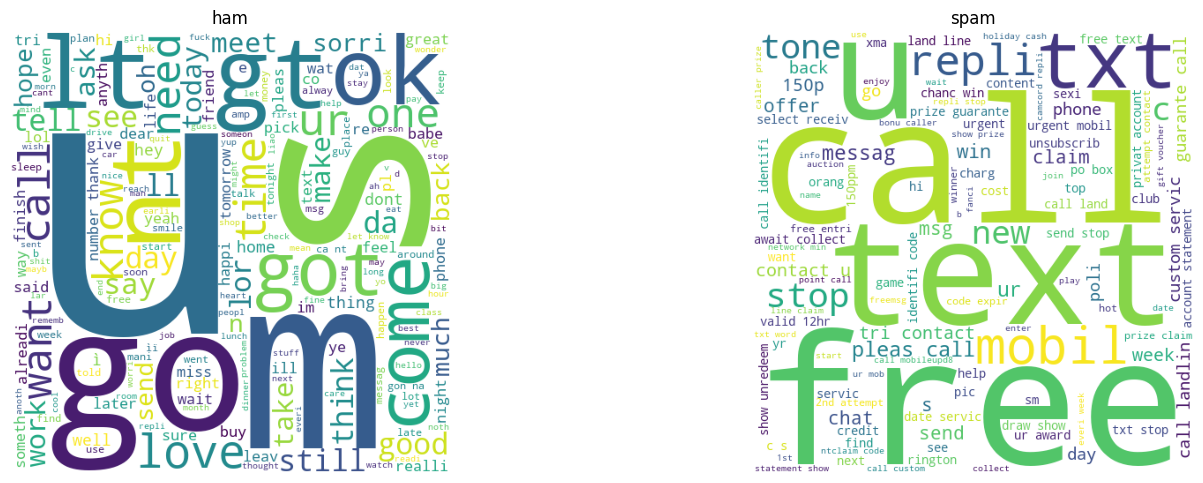

so we can see that the words used in ham_mails and spam_mails are NOT SAME,
which will help in identifying both kind of mails distinctivly.


In [83]:
from wordcloud import WordCloud

wc1 = WordCloud(height=500, width=500, min_font_size=10, background_color='white')
wc2 = WordCloud(height=500, width=500, min_font_size=10, background_color='white')
ham_wc = wc1.generate(data[data['target']==0]['clean_mail'].str.cat(sep=' '))
spam_wc = wc2.generate(data[data['target']==1]['clean_mail'].str.cat(sep=' '))

figure, axis = plt.subplots(1, 2, figsize=(15,5))
plt.tight_layout()
axis[0].imshow(ham_wc)
axis[0].axis("off")
axis[0].set_title("ham")


axis[1].imshow(spam_wc)
axis[1].axis("off")
axis[1].set_title("spam")
plt.show()
print("""so we can see that the words used in ham_mails and spam_mails are NOT SAME,
which will help in identifying both kind of mails distinctivly.""")

In [84]:
# so this means we can use this col to predict the target class.

### lets check the top 25 cols that are most frequent in both categories of mails.
this will help us to predict both categories distinctively

In [85]:
spam_corpus = []
for msg in data[data['target'] == 1]['clean_mail'].to_list():
    for word in msg.split():
        # if word not in spam_corpus:
        spam_corpus.append(word)

len(spam_corpus), spam_corpus

(10775,
 ['free',
  'entri',
  '2',
  'wkli',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkt',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  '87121',
  'receiv',
  'entri',
  'question',
  'std',
  'txt',
  'rate',
  'c',
  's',
  'appli',
  '08452810075over18',
  's',
  'freemsg',
  'hey',
  'darl',
  's',
  '3',
  'week',
  's',
  'word',
  'back',
  'd',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chg',
  'send',
  'rcv',
  'winner',
  'valu',
  'network',
  'custom',
  'select',
  'receivea',
  'prize',
  'reward',
  'claim',
  'call',
  '09061701461',
  'claim',
  'code',
  'kl341',
  'valid',
  '12',
  'hour',
  'mobil',
  '11',
  'month',
  'u',
  'r',
  'entitl',
  'updat',
  'latest',
  'colour',
  'mobil',
  'camera',
  'free',
  'call',
  'mobil',
  'updat',
  'co',
  'free',
  '08002986030',
  'six',
  'chanc',
  'win',
  'cash',
  '100',
  '20000',
  'pound',
  'txt',
  'csh11',
  'send',
  '87575',
  'cost',
  '150pday',
  '6day',
  '16',


In [86]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(25))

,0,1
0,call,321
1,free,191
2,2,157
3,txt,141
4,u,135
5,text,122
6,ur,119
7,mobil,114
8,stop,106
9,repli,103


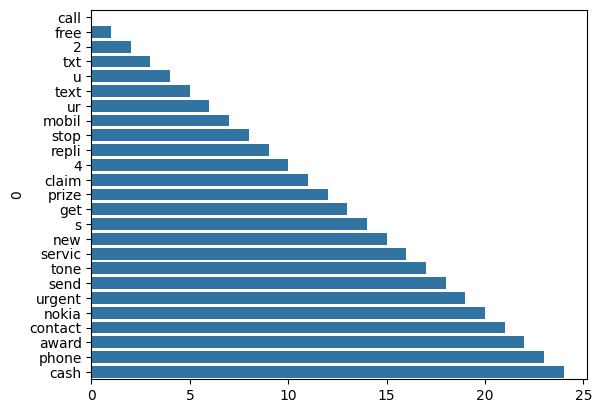

In [87]:
# spam
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(25))[0])
plt.show()

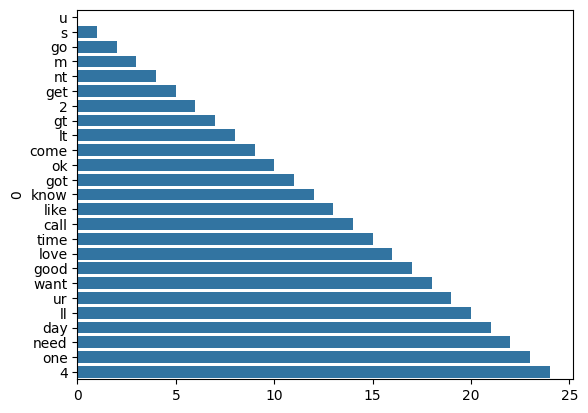

In [88]:
# ham
ham_corpus = []
for msg in data[data['target'] == 0]['clean_mail'].to_list():
    for word in msg.split():
        # if word not in spam_corpus:
        ham_corpus.append(word)

len(ham_corpus), ham_corpus

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(25))[0])
plt.show()

In [89]:
data.to_csv(r'C:\Users\sarvesh.kesharwani\Pictures\DSC\Spam_Classifier\3. eda_n_featureEngineering\FEed_data.csv', index=False)